Exploratory Analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import math
from sklearn import svm, metrics, ensemble
from sklearn.model_selection import train_test_split
from tabulate import tabulate

In [300]:
data_p = pd.read_csv('data/student-por.csv', delimiter=';')

In [308]:
## Add Parent Education
data_p['combined_Pedu'] = (data_p['Medu'] + data_p['Fedu']) / 2 

# Summary statistics
## Count, Mean, standard deviation 

In [309]:
# Numeric Variabels
descriptives_data_p = round(data_p.describe(), 2)
table = descriptives_data_p.to_latex()
print(table)

\begin{tabular}{lrrrrrrrrrrrrrrrrr}
\toprule
{} &     age &    Medu &    Fedu &  traveltime &  studytime &  failures &  famrel &  freetime &   goout &    Dalc &    Walc &  health &  absences &      G1 &      G2 &      G3 &  combined\_Pedu \\
\midrule
count &  649.00 &  649.00 &  649.00 &      649.00 &     649.00 &    649.00 &  649.00 &    649.00 &  649.00 &  649.00 &  649.00 &  649.00 &    649.00 &  649.00 &  649.00 &  649.00 &         649.00 \\
mean  &   16.74 &    2.51 &    2.31 &        1.57 &       1.93 &      0.22 &    3.93 &      3.18 &    3.18 &    1.50 &    2.28 &    3.54 &      3.66 &   11.40 &   11.57 &   11.91 &           2.41 \\
std   &    1.22 &    1.13 &    1.10 &        0.75 &       0.83 &      0.59 &    0.96 &      1.05 &    1.18 &    0.92 &    1.28 &    1.45 &      4.64 &    2.75 &    2.91 &    3.23 &           1.01 \\
min   &   15.00 &    0.00 &    0.00 &        1.00 &       1.00 &      0.00 &    1.00 &      1.00 &    1.00 &    1.00 &    1.00 &    1.00 &      0.00 &  

C:\Users\Lsped\AppData\Local\Temp\ipykernel_6828\2501870296.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = descriptives_data_p.to_latex()


In [314]:
# Categorical Variables
# Retrieve categorical column names
categorical_columns = data_p.select_dtypes(include=['object', 'category']).columns.tolist()

# Subset of data with only categorical columns
data_p_cat = data_p[categorical_columns]

descriptives_cat_data_p = round(data_p_cat.describe(), 2)
table = descriptives_cat_data_p.to_latex()
print(table)

\begin{tabular}{llllllllllllllllll}
\toprule
{} & school &  sex & address & famsize & Pstatus &   Mjob &   Fjob &  reason & guardian & schoolsup & famsup & fatherd & activities & nursery & higher & internet & romantic \\
\midrule
count  &    649 &  649 &     649 &     649 &     649 &    649 &    649 &     649 &      649 &       649 &    649 &     649 &        649 &     649 &    649 &      649 &      649 \\
unique &      2 &    2 &       2 &       2 &       2 &      5 &      5 &       4 &        3 &         2 &      2 &       2 &          2 &       2 &      2 &        2 &        2 \\
top    &     GP &    F &       U &     GT3 &       T &  other &  other &  course &   mother &        no &    yes &      no &         no &     yes &    yes &      yes &       no \\
freq   &    423 &  383 &     452 &     457 &     569 &    258 &    367 &     285 &      455 &       581 &    398 &     610 &        334 &     521 &    580 &      498 &      410 \\
\bottomrule
\end{tabular}



C:\Users\Lsped\AppData\Local\Temp\ipykernel_6828\2872549094.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = descriptives_cat_data_p.to_latex()


# Visualisation (Histograms/ Barplots)

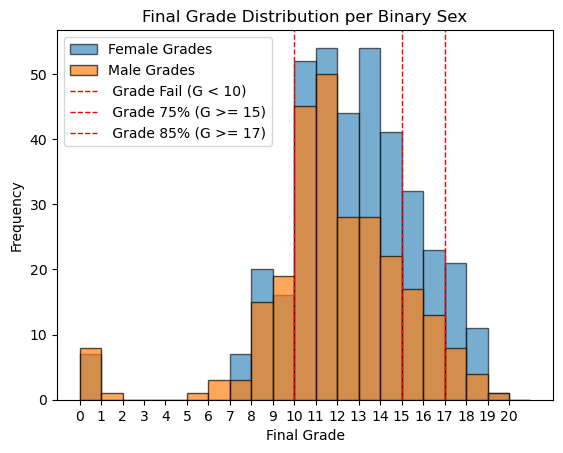

In [279]:
# Final Grade Distribution per Sex
grade_dist = data_p['G3']
female_grades = data_p[data_p['sex'] == 'F']['G3']
male_grades = data_p[data_p['sex'] == 'M']['G3']

plt.hist(female_grades, bins = range(0, 22,1), label = 'Female Grades', edgecolor='black', alpha = 0.6)
plt.hist(male_grades, bins = range(0, 22,1), label  = 'Male Grades', edgecolor='black', alpha = 0.68)
plt.title('Final Grade Distribution per Binary Sex')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')

plt.xlim = (0, 21)
plt.xticks(range(0,21,1))
plt.axvline(x = 10, color='red', linestyle='--', linewidth=1, label=' Grade Fail (G < 10)')
plt.axvline(x = 15, color='red', linestyle='--', linewidth=1, label=' Grade 75% (G >= 15)')
plt.axvline(x = 17, color='red', linestyle='--', linewidth=1, label=' Grade 85% (G >= 17)')
plt.legend()
plt.show()

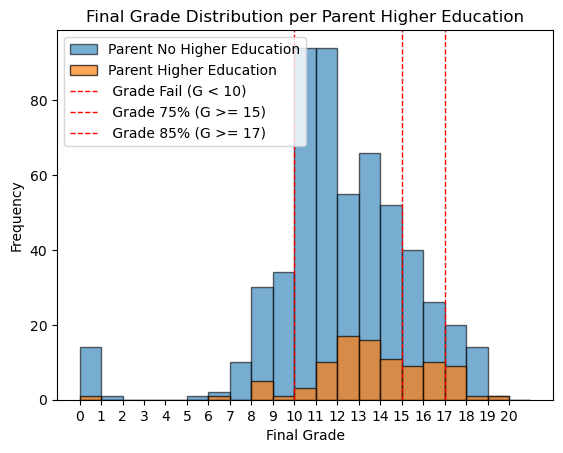

In [289]:
# Final Grade distribution per Parent Higher Education
grade_dist = data_p['G3']
higher_parent_grades = data_p[data_p['combined_Pedu'] > 3.5]['G3']
not_higher_parent_grades = data_p[data_p['combined_Pedu'] <= 3.5]['G3']

median_higher_parent = higher_parent_grades.median()
median_not_higher_parent = not_higher_parent_grades.median()

plt.hist(not_higher_parent_grades, bins = range(0, 22,1), label  = 'Parent No Higher Education', edgecolor='black', alpha = 0.6)
plt.hist(higher_parent_grades, bins = range(0, 22,1), label = 'Parent Higher Education', edgecolor='black', alpha = 0.7)
plt.title('Final Grade Distribution per Parent Higher Education')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')

plt.xlim = (0, 21)
plt.xticks(range(0,21,1))
plt.axvline(x = 10, color='red', linestyle='--', linewidth=1, label=' Grade Fail (G < 10)')
plt.axvline(x = 15, color='red', linestyle='--', linewidth=1, label=' Grade 75% (G >= 15)')
plt.axvline(x = 17, color='red', linestyle='--', linewidth=1, label=' Grade 85% (G >= 17)')

plt.legend()
plt.show()


<AxesSubplot: title={'center': 'Median Grade per Binary Sex'}, ylabel='Binary Sex'>

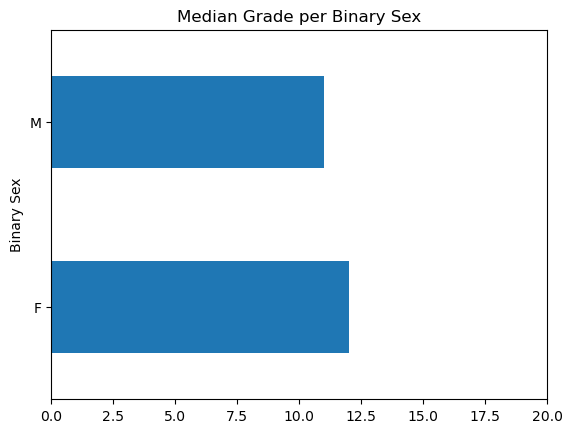

In [191]:
# G3 differences per sex
data_p.groupby('sex')['G3'].median().plot(kind='barh', ylabel = 'Binary Sex', title = 'Median Grade per Binary Sex', xlim = (0,20))

<AxesSubplot: title={'center': 'Median Grade per Parent Education Level'}, ylabel='Combined Parent Education Level'>

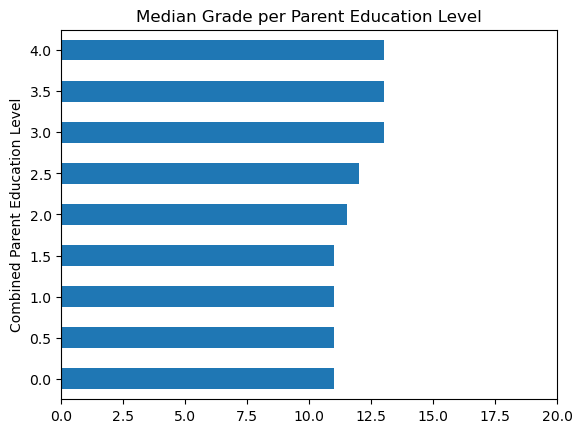

In [189]:
# G3 differences per sex
data_p.groupby('combined_Pedu')['G3'].median().plot(kind='barh', ylabel = 'Combined Parent Education Level', title = 'Median Grade per Parent Education Level', xlim = (0,20))

In [12]:
# Recoding of categorical variables
data_p = data_p.replace(to_replace=['M', 'F'], value=[0,1]) #sex
data_p = data_p.replace(to_replace=['GP', 'MS'], value=[0,1]) #school
data_p = data_p.replace(to_replace=['A', 'T'], value=[0,1]) #Pstatus
data_p = data_p.replace(to_replace=['GT3', 'LE3'], value=[0,1]) #famsize
data_p = data_p.replace(to_replace=['U', 'R'], value=[0,1]) #address
data_p = data_p.replace(to_replace=['father', 'mother'], value=[0,1]) #guardian
data_p = data_p.replace(to_replace=['at_home', 'health', 'other', 'services', 'teacher'], value=[0,1,2,3,4]) #Mjob, Fjob
data_p = data_p.replace(to_replace=['course', 'other', 'home', 'reputation'], value=[0,1,2,3]) #reason
data_p = data_p.replace(to_replace=['no', 'yes'], value=[0,1]) #fatherd, nursery, higher, famsup, romantic
print(data_p.columns)
print(data_p.shape)
(data_p.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.590139,16.744222,0.303544,0.295840,0.876733,2.514638,2.306626,1.941448,2.224961,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,1.248317,0.863487,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,0.000000,1.000000,17.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000
